In [1]:
#import library
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  recall_score


In [2]:

df = pd.read_csv('FOOD-DATA-GROUP5.csv')

print(df.head())
print(df.info())
print(df.describe())

# # Tăng chiều rộng và hiển thị đầy đủ các cột
# pd.set_option('display.max_columns', None)  # Không giới hạn số lượng cột
# pd.set_option('display.width', 1000)       # Tăng chiều rộng dòng hiển thị
# pd.set_option('display.max_colwidth', None)  # Không giới hạn độ dài của cột văn bản

#ktra du lieu thieu
print(df.isnull().sum())

   Unnamed: 0.1  Unnamed: 0                    food  Caloric Value    Fat  \
0             0           0  margarine with yoghurt             88    9.8   
1             1           1   sunflower seed butter             99    8.8   
2             2           2            hazelnut oil            120   13.6   
3             3           3       menhaden fish oil           1966  218.0   
4             4           4      cod liver fish oil            123   13.6   

   Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  \
0             1.9                   5.6                   2.0          0.073   
1             0.7                   6.2                   1.6          3.700   
2             1.0                  10.6                   1.4          0.000   
3            66.3                  58.2                  74.5          0.000   
4             3.1                   6.4                   3.1          0.000   

   Sugars  ...  Calcium  Copper   Iron  Magnesium  Manga

In [3]:

# Tách các cột số cần chuẩn hóa (nếu không được chỉ định, tự động chọn tất cả các cột số)
numeric_columns = [
    'Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
    'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
    'Calcium', 'Iron', 'Magnesium', 'Manganese' , 'Selenium', 
    'Phosphorus', 'Potassium', 'Zinc' , 
]

epsilon = 1e-3  # Giá trị nhỏ để thay thế 0
df[numeric_columns] = df[numeric_columns].replace(0, epsilon) # Xử lý các giá trị bằng 0

# Chuẩn hóa bằng Min-Max Scaling
scaler = MinMaxScaler()
food_data= df[numeric_columns].copy()
food_data[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Hiển thị dữ liệu
print("Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):")
print(food_data.head())

Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):
   Caloric Value       Fat  Carbohydrates    Sugars   Protein  Dietary Fiber  \
0       0.026379  0.044950       0.000379  0.000000  0.000664       0.000000   
1       0.029676  0.040363       0.019458  0.016181  0.032623       0.015342   
2       0.035971  0.062381       0.000000  0.000000  0.000000       0.000000   
3       0.589328  1.000000       0.000000  0.000000  0.000000       0.000000   
4       0.036870  0.062381       0.000000  0.000000  0.000000       0.000000   

   Cholesterol    Sodium     Water   Calcium      Iron  Magnesium  Manganese  \
0     0.000000  0.000344  0.005346  0.003225  0.000890   0.000400   0.000000   
1     0.000000  0.001296  0.000136  0.011750  0.023939   0.066683   0.000663   
2     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
3     1.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
4     0.068233  0.000000  0.000000  0.000000  0.000000   0.000000   0.0000

               Heart Disease Risk  Diabetes Risk  Cancer Risk  Gout Risk  \
Caloric Value            0.223858       0.082910     0.492988   0.430377   
Fat                      0.339160      -0.021959     0.759982   0.238531   
Carbohydrates           -0.021936       0.258540    -0.049154   0.294636   
Sugars                  -0.011811       0.777015    -0.026466  -0.020114   
Protein                 -0.015561      -0.017389    -0.034869   0.784430   
Dietary Fiber           -0.015670       0.047338    -0.035114   0.441018   
Cholesterol              0.731194      -0.012893     0.318980   0.375050   
Sodium                  -0.004794       0.000628    -0.010743  -0.011911   
Water                   -0.024043       0.091060    -0.053874   0.074056   
Calcium                 -0.015308       0.013891    -0.034302   0.330568   
Iron                    -0.015821       0.031706    -0.035452   0.614206   
Magnesium               -0.013503       0.006414    -0.030256   0.538372   
Manganese   

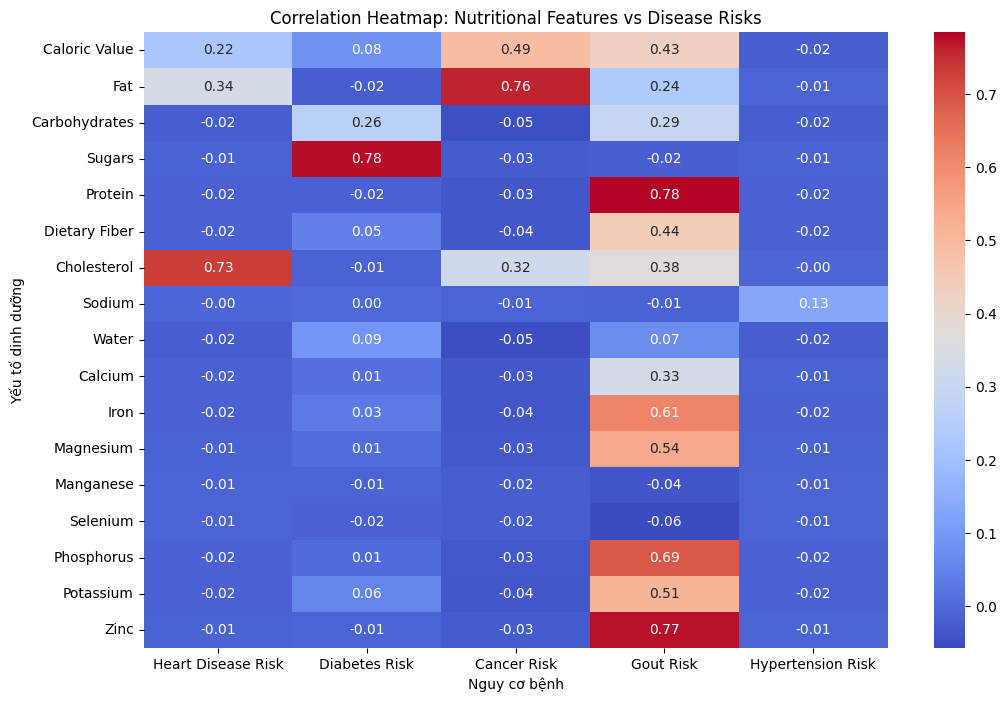

In [4]:
# Giả định các ngưỡng bệnh cho dữ liệu
# Quy đổi các ngưỡng cho dữ liệu chuẩn hóa (khoảng [0, 1])
food_data['Heart Disease Risk'] = ((food_data['Cholesterol'] > 0.66) & (food_data['Fat'] > 0.5)).astype(int) 
food_data['Diabetes Risk'] = ((food_data['Sugars'] > 0.5) & (food_data['Carbohydrates'] > 0.07)).astype(int) 
food_data['Cancer Risk'] = ((food_data['Fat'] > 0.67) & (food_data['Protein'] < 0.3)).astype(int)  
food_data['Gout Risk'] = ((food_data['Protein'] > 0.5)).astype(int)  
food_data['Hypertension Risk'] = ((food_data['Sodium'] > 0.04) & (food_data['Calcium'] < 0.02)).astype(int) 

# Chọn các cột dinh dưỡng và nguy cơ bệnh
nutritional_features = ['Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
                        'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
                        'Calcium', 'Iron', 'Magnesium', 'Manganese' , 'Selenium', 
                        'Phosphorus', 'Potassium', 'Zinc']
disease_columns = ['Heart Disease Risk', 'Diabetes Risk', 'Cancer Risk', 'Gout Risk', 'Hypertension Risk']
# Lọc dữ liệu
subset = food_data[nutritional_features + disease_columns]

# Nếu có NaN, có thể loại bỏ các dòng chứa NaN hoặc điền giá trị thiếu
subset_cleaned = subset.dropna()  # Loại bỏ các dòng chứa NaN

# Tính ma trận tương quan
correlation_matrix = subset_cleaned.corr().loc[nutritional_features, disease_columns]
print(correlation_matrix)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Nutritional Features vs Disease Risks')
plt.xlabel('Nguy cơ bệnh')
plt.ylabel('Yếu tố dinh dưỡng')
plt.show()


In [5]:

# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Heart Disease Risk']  # bệnh tim 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng tới bệnh tim:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất ảnh hưởng tới bệnh tim: ['Caloric Value', 'Fat', 'Carbohydrates', 'Cholesterol', 'Water']


In [6]:
# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Diabetes Risk']  # bệnh tiểu đường 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng đến bệnh tiểu đường:", 
      [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất ảnh hưởng đến bệnh tiểu đường: ['Caloric Value', 'Carbohydrates', 'Sugars', 'Water', 'Potassium']


In [7]:
# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Cancer Risk']  # bệnh ung thư 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng tới bệnh ung thư:", 
      [nutritional_features[i] for i in important_features])


Các yếu tố quan trọng nhất ảnh hưởng tới bệnh ung thư: ['Caloric Value', 'Fat', 'Carbohydrates', 'Cholesterol', 'Water']


In [8]:
# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Gout Risk']  # bệnh Gout 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng tới bệnh GOUT:", 
      [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất ảnh hưởng tới bệnh GOUT: ['Protein', 'Iron', 'Magnesium', 'Phosphorus', 'Zinc']


In [9]:
# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Hypertension Risk']  # bệnh cao huyết áp 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất: ['Caloric Value', 'Carbohydrates', 'Sodium', 'Water', 'Potassium']


In [10]:
# # Biểu đồ boxplot so sánh lượng chất béo theo nguy cơ bệnh tim mạch
# sns.boxplot(x=food_data['Heart Disease Risk'], y=food_data['Cholesterol'])
# plt.title('So sánh lượng chất Cholesterol theo nguy cơ bệnh tim mạch')
# plt.xlabel('Nguy cơ Bệnh Tim Mạch')
# plt.ylabel('Lượng Chất Cholesterol')
# plt.show()


In [11]:
# # Biểu đồ histogram cho phân phối calo với nguy cơ tiểu đường
# sns.histplot(food_data, x='Sugars', hue='Diabetes Risk', kde=True, bins=20)
# plt.title('Phân phối Calo với Nguy cơ Tiểu Đường')
# plt.xlabel('Calo')
# plt.ylabel('Tần suất')
# plt.show()


In [12]:
# Biến mục tiêu (target_Heart_Disease): Một trong các cột nguy cơ bệnh
# Biến dự đoán (features_Heart_Disease): Các cột chứa thông tin dinh dưỡng 
# Xác định biến mục tiêu và biến dự đoán
target_Heart_Disease = 'Heart Disease Risk'  
features_Heart_Disease = ['Fat', 'Caloric Value', 'Cholesterol', 'Carbohydrates', 'Water']  

X_heart = food_data[features_Heart_Disease]
print("Tập kiểm thử X_heart : \n", X_heart)
y_heart = food_data[target_Heart_Disease]
print("Tập kiểm thử y_heart : \n", y_heart)


# Chia nhỏ mô hình cho tập
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.4, random_state=42)  
print("Kích thước tập huấn luyện:", X_train_heart.shape)
print("Kích thước tập kiểm thử:", X_test_heart.shape)


Tập kiểm thử X_heart : 
           Fat  Caloric Value  Cholesterol  Carbohydrates     Water
0    0.044950       0.026379     0.000000       0.000379  0.005346
1    0.040363       0.029676     0.000000       0.019458  0.000136
2    0.062381       0.035971     0.000000       0.000000  0.000000
3    1.000000       0.589328     1.000000       0.000000  0.000000
4    0.062381       0.036870     0.068233       0.000000  0.000000
..        ...            ...          ...            ...       ...
949  0.015592       0.069244     0.000000       0.240396  0.006992
950  0.011005       0.037170     0.000000       0.023667  0.000000
951  0.003665       0.039268     0.000000       0.169380  0.001918
952  0.027060       0.073441     0.000000       0.243026  0.003564
953  0.001372       0.032374     0.000000       0.129401  0.001233

[954 rows x 5 columns]
Tập kiểm thử y_heart : 
 0      0
1      0
2      0
3      1
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Heart Disease Ris

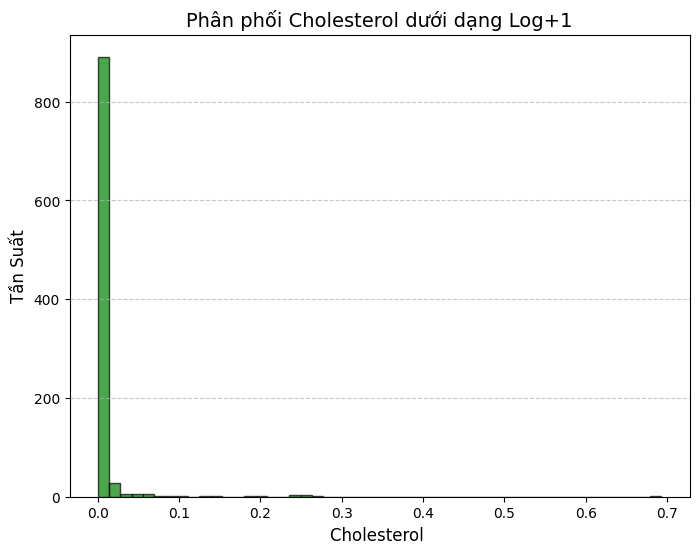

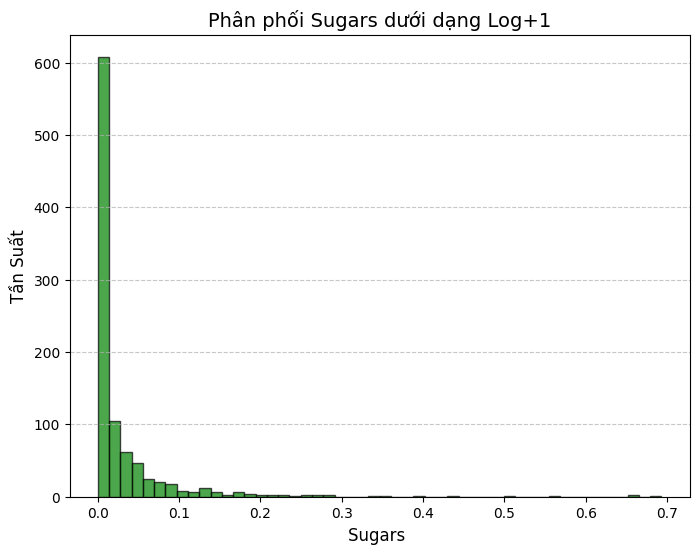

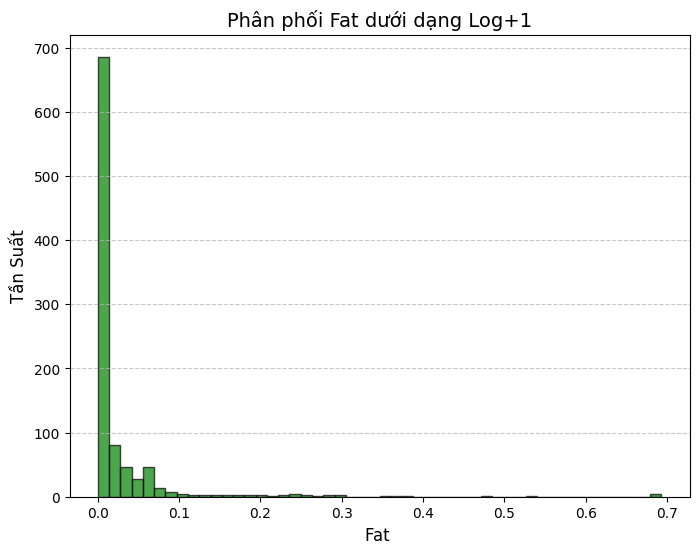

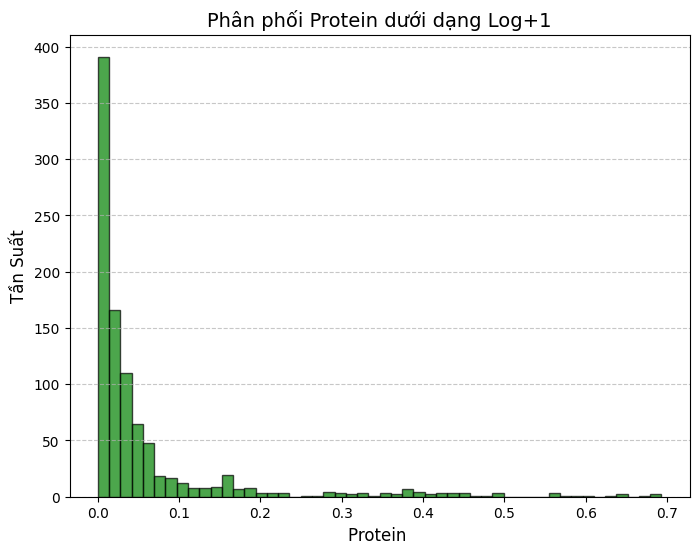

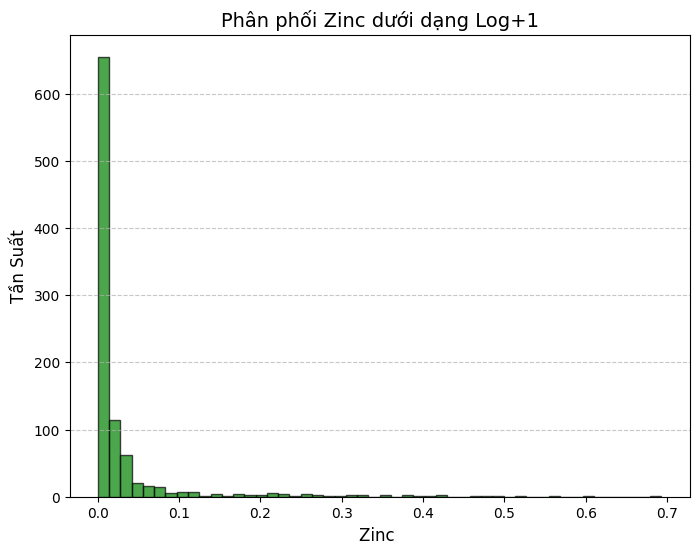

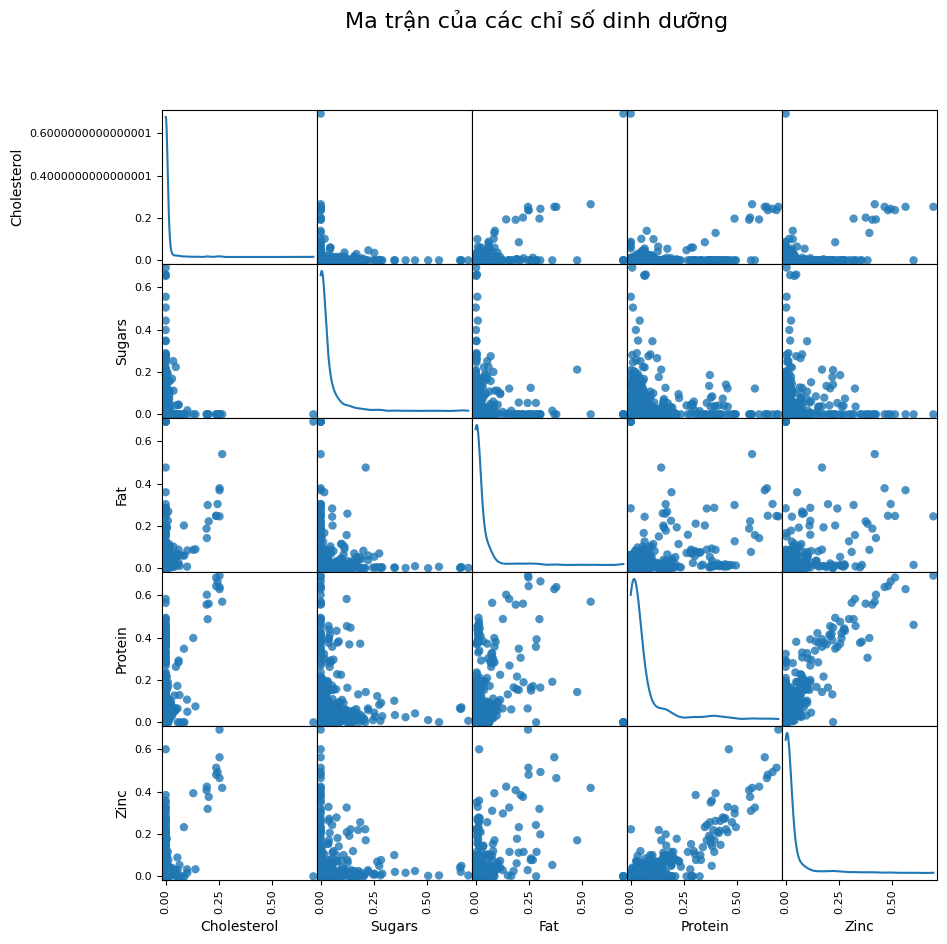

In [13]:
# Các cột được  chỉnh để phân tích
columns_to_analyze = ['Cholesterol', 'Sugars', 'Fat', 'Protein', 'Zinc']

# Biến đổi logarit chính xác bằng cách áp dụng trên mỗi cột
log_transformed_data = food_data[columns_to_analyze].apply(
    lambda col: col.apply(lambda x: np.log(x + 1) if pd.notna(x) and x > 0 else 0)
)

# Trực quan hóa dữ liệu bằng biểu đồ
for column in columns_to_analyze:
    plt.figure(figsize=(8, 6))
    plt.hist(log_transformed_data[column].dropna(), bins=50, edgecolor='k', alpha=0.7, color='green')
    plt.title(f'Phân phối {column} dưới dạng Log+1', fontsize=14)
    plt.xlabel(f'{column} ', fontsize=12)
    plt.ylabel('Tần Suất', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Trực quan hóa dữ liệu bằng scatter_matrix
pd.plotting.scatter_matrix(
    log_transformed_data,
    figsize=(10, 10),
    alpha=0.8,
    diagonal='kde',  # Kernel Density Estimate on the diagonal
    grid=True,
    marker='o'
)
plt.suptitle("Ma trận của các chỉ số dinh dưỡng", fontsize=16)
plt.show()



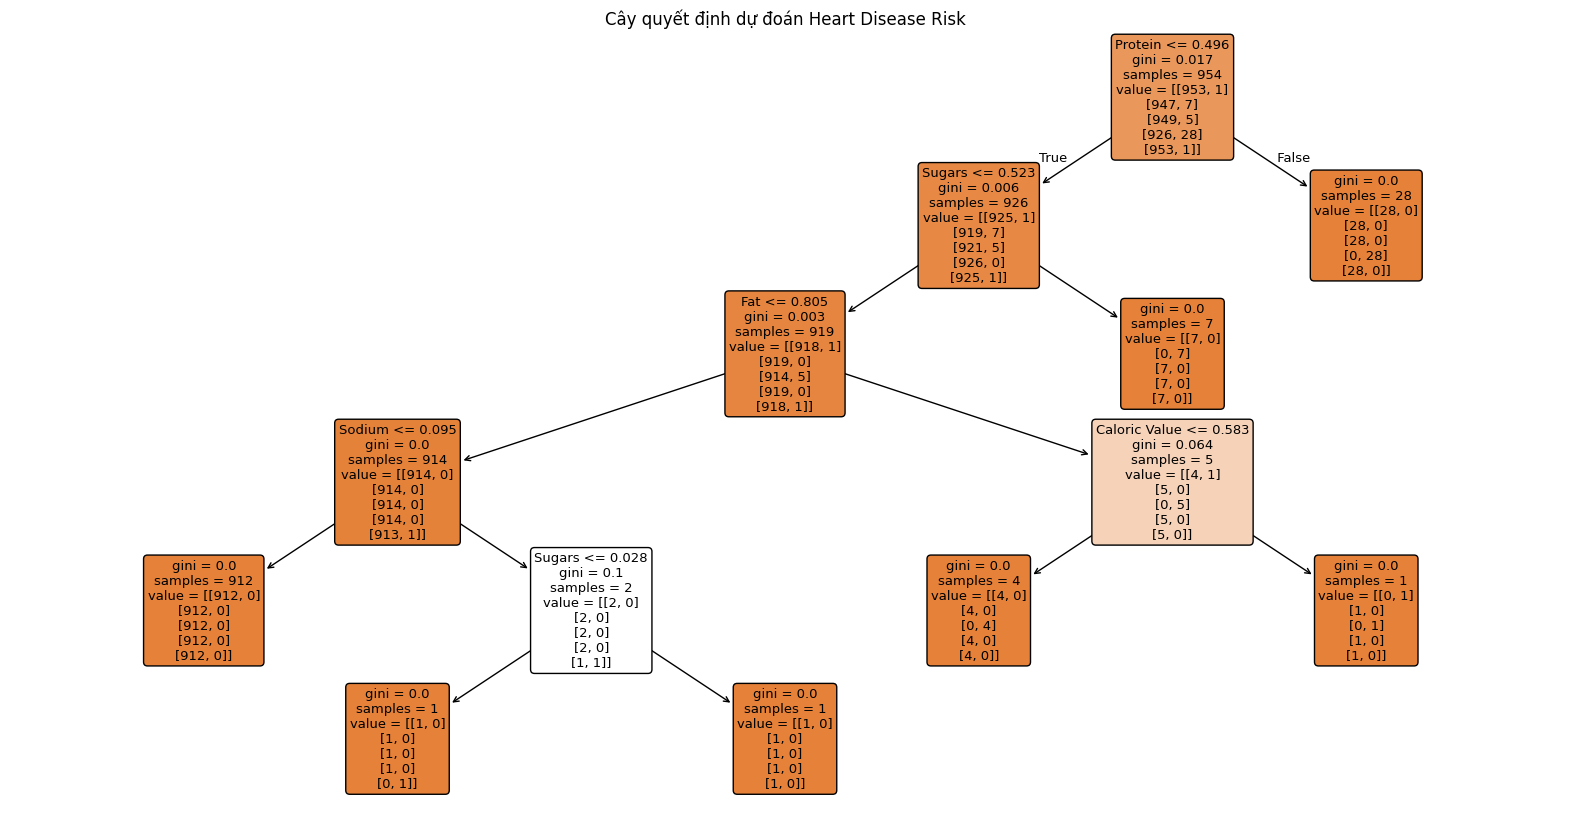

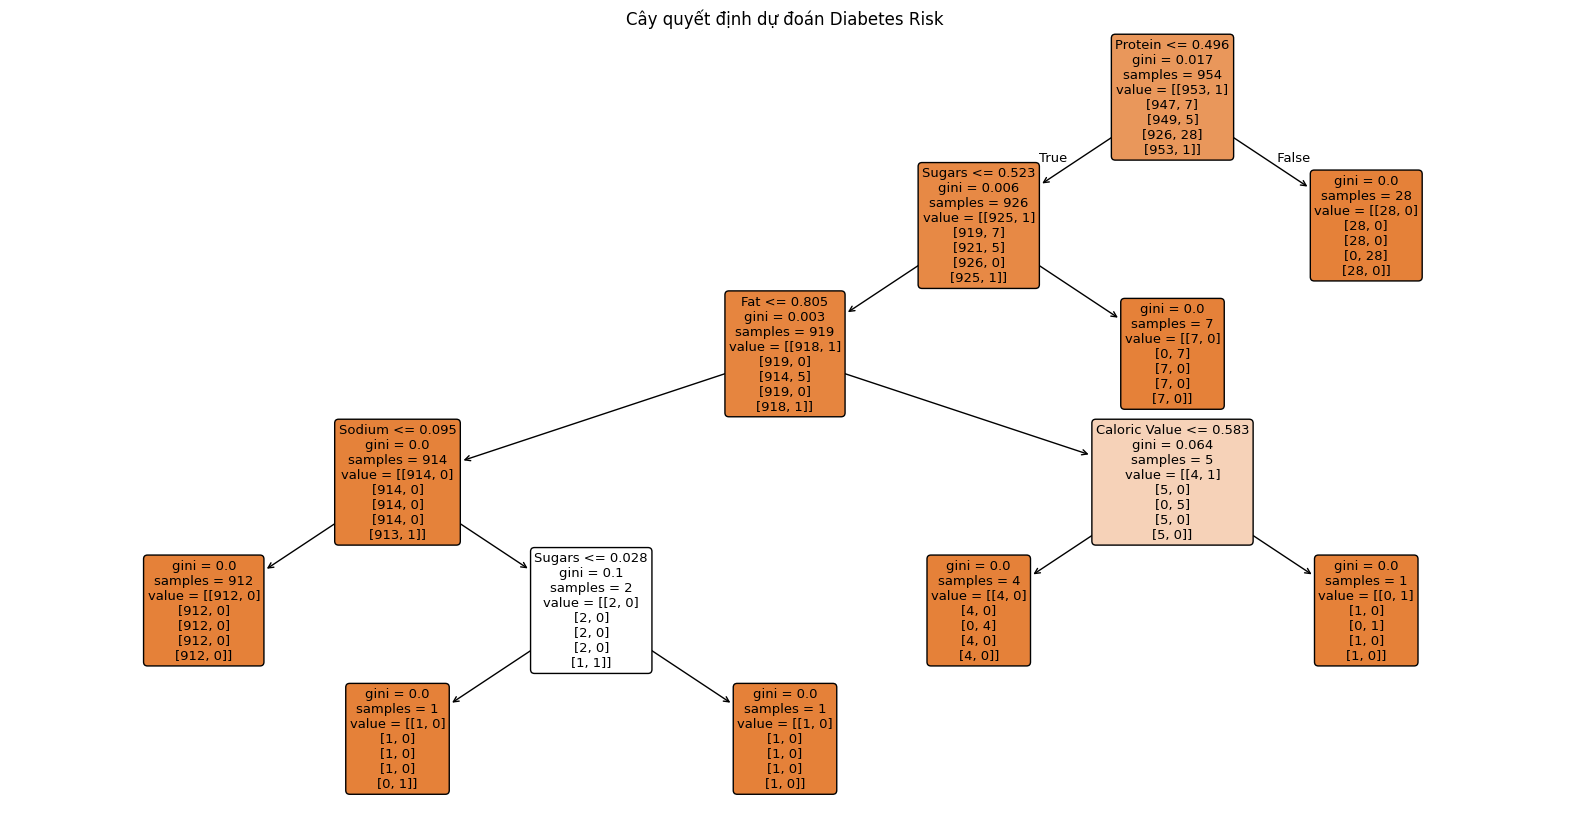

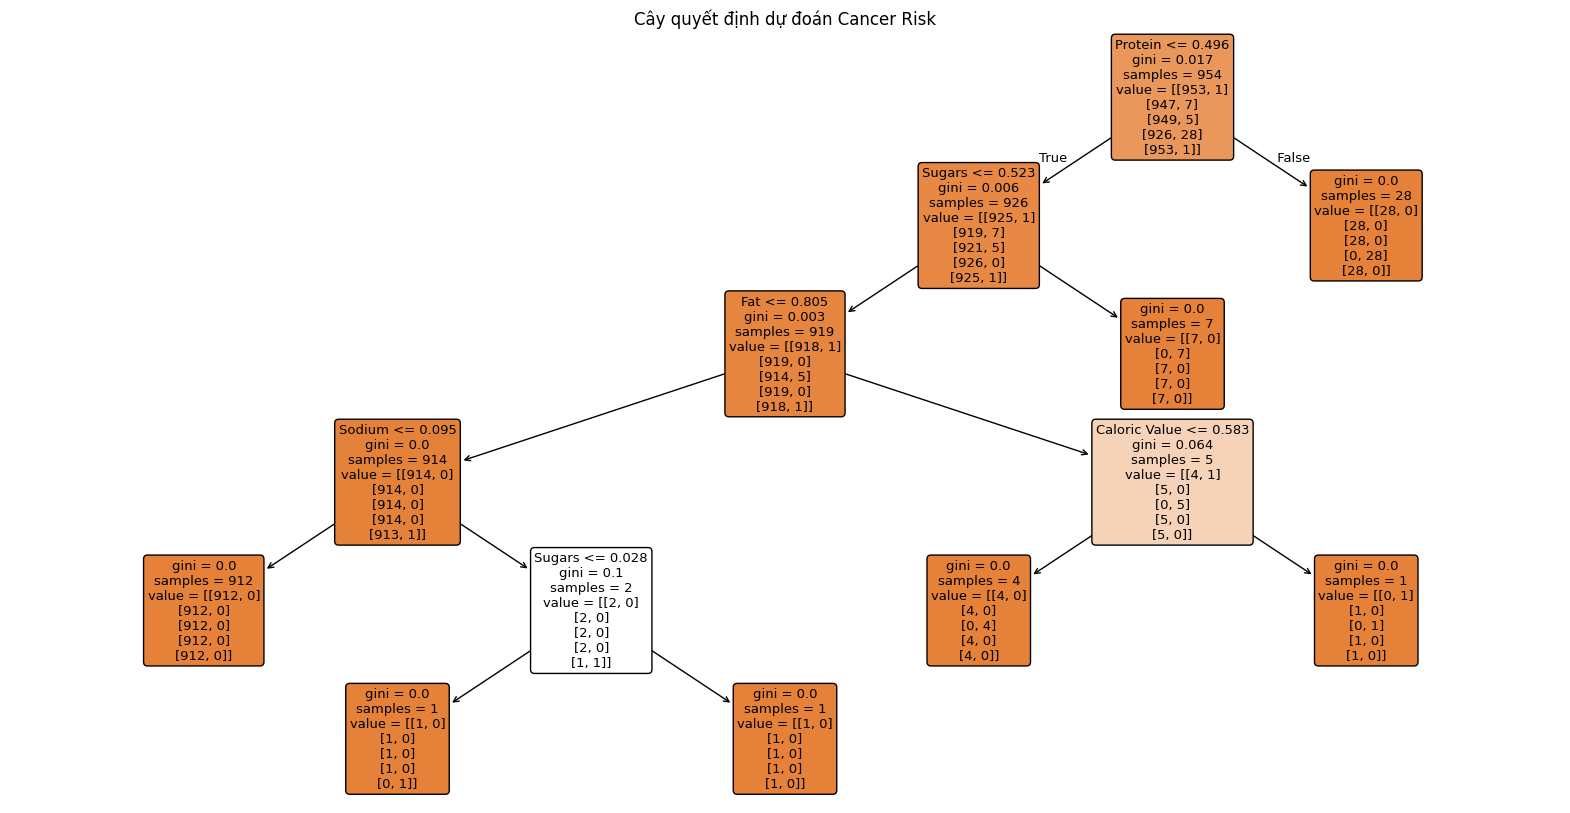

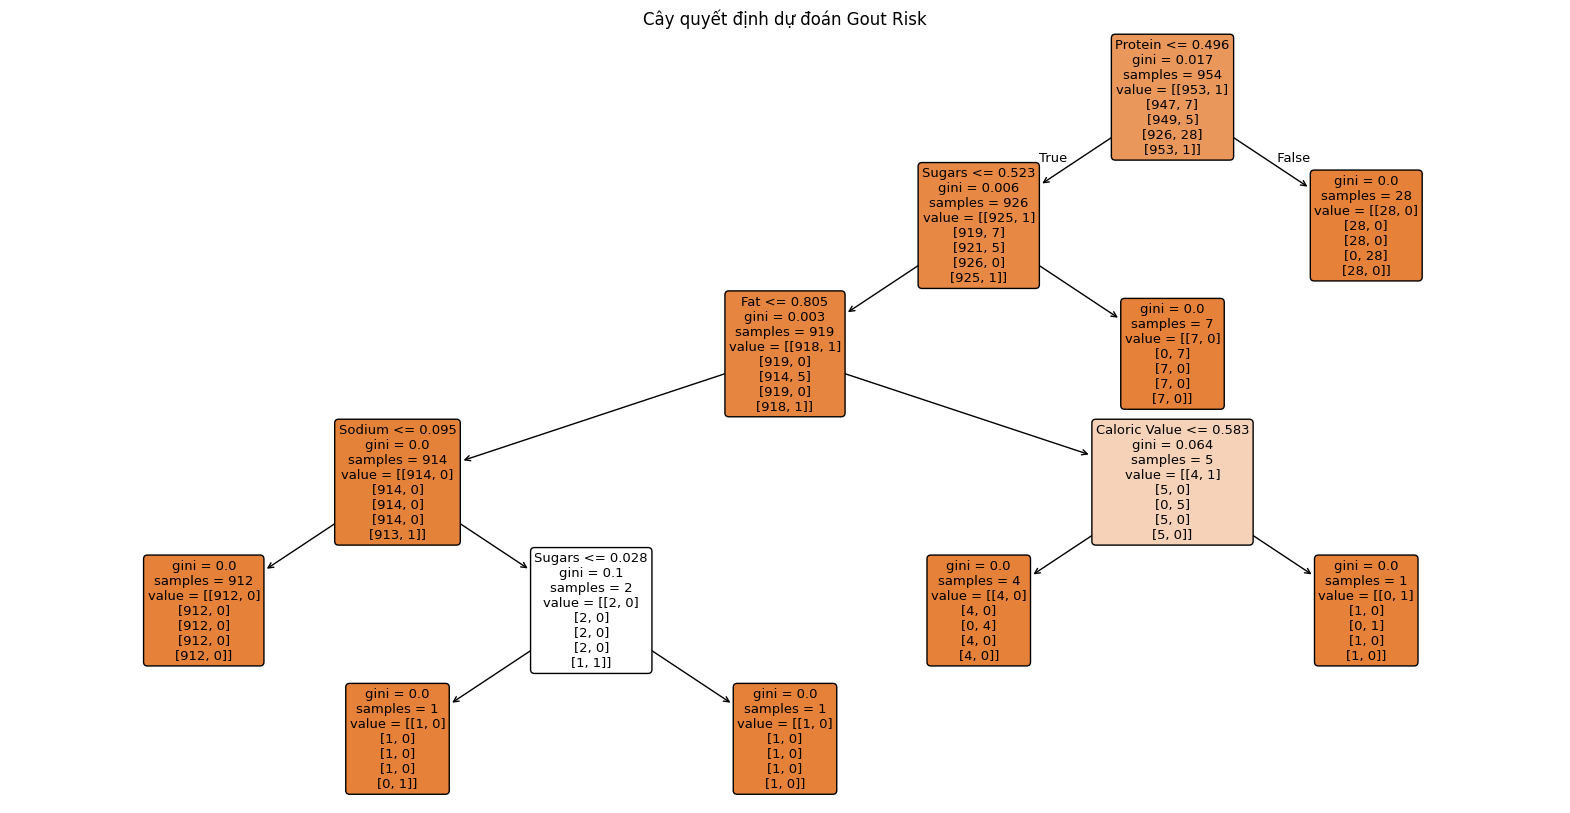

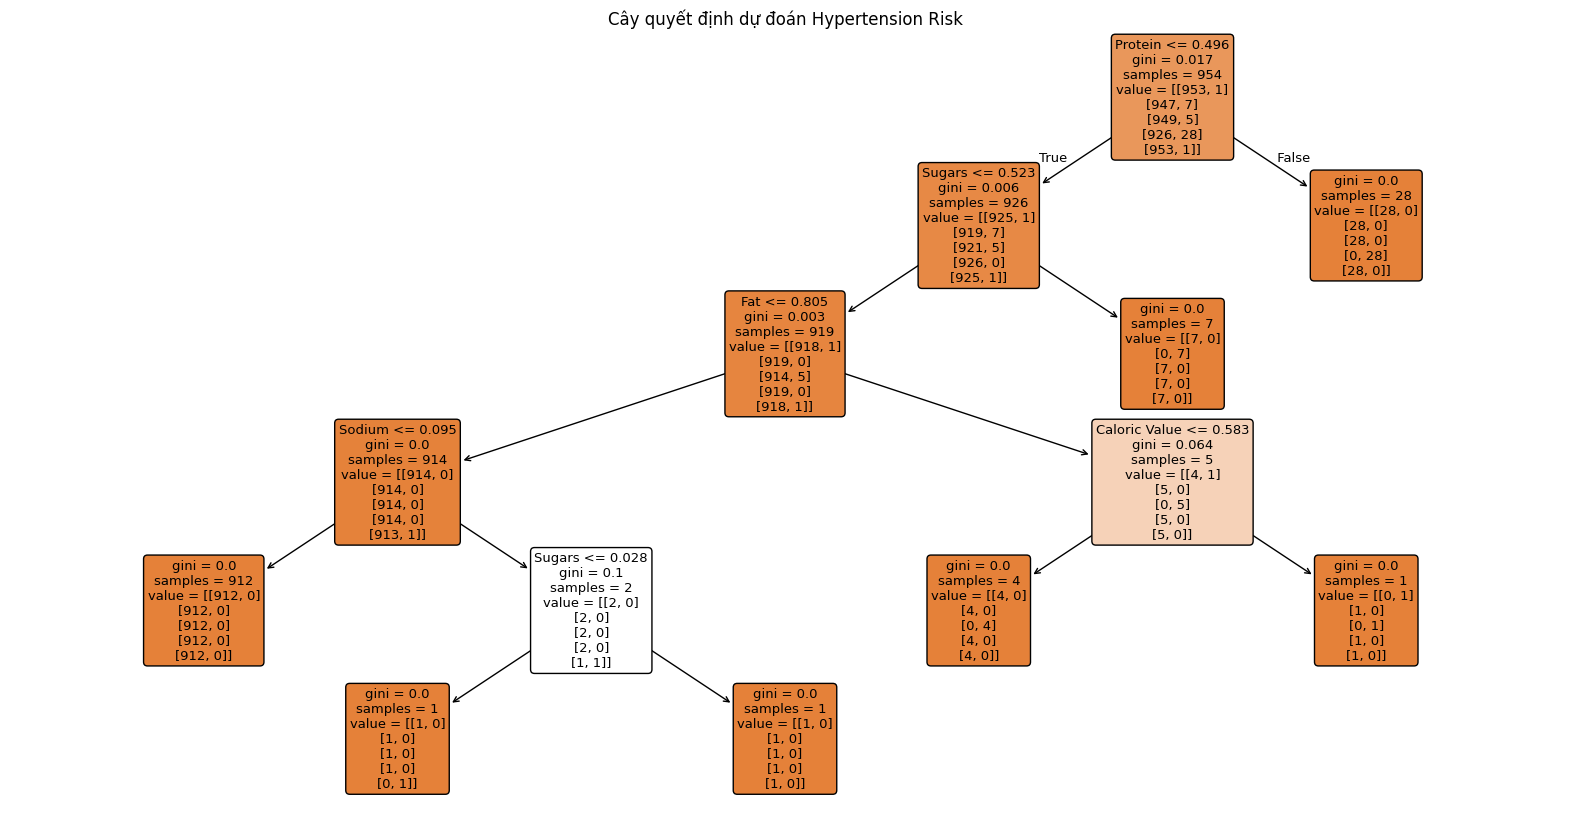

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

for disease in disease_columns:
    # Chuẩn bị dữ liệu
    X = food_data[nutritional_features]  # Xử lý giá trị thiếu bằng 0
    y = food_data[disease_columns]
    
    # Huấn luyện cây quyết định
    model = DecisionTreeClassifier(max_depth=5, random_state=42)
    model.fit(X, y)
    
    # Vẽ cây quyết định
    plt.figure(figsize=(20, 10))
    plot_tree(
        model,
        feature_names=nutritional_features,
        class_names=["No Risk", "Risk"],
        filled=True,
        rounded=True
    )
    plt.title(f"Cây quyết định dự đoán {disease}")
    plt.show()
